In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("12 (2) (Data).csv")
data.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


In [3]:
data.tail()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
1329,1.525740e+12,5-8-2018,XRP-USDT,0.82490,0.84802,0.79200,0.80667,12971303.18,10571844.13
1330,1.525650e+12,5-7-2018,XRP-USDT,0.86482,0.86886,0.80000,0.82490,17303486.40,14192279.73
1331,1.525560e+12,5-6-2018,XRP-USDT,0.90280,0.91800,0.83774,0.86483,16002035.80,13997141.56
1332,1.525480e+12,5-5-2018,XRP-USDT,0.88980,0.93500,0.88800,0.90280,16816165.30,15282000.08
1333,1.525390e+12,5-4-2018,XRP-USDT,0.50000,1.50000,0.50000,0.88990,20890213.82,18946724.69


In [4]:
data.shape

(1334, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   date         1334 non-null   object 
 2   symbol       1334 non-null   object 
 3   open         1334 non-null   float64
 4   high         1334 non-null   float64
 5   low          1334 non-null   float64
 6   close        1334 non-null   float64
 7   Volume XRP   1334 non-null   float64
 8   Volume USDT  1334 non-null   float64
dtypes: float64(7), object(2)
memory usage: 93.9+ KB


In [6]:
data['symbol'].value_counts()

symbol
XRP-USDT    1334
Name: count, dtype: int64

In [7]:
data1 = data.copy()
data1['date'] = pd.to_datetime(data1['date'])
data1.set_index('date', inplace=True)
data1.head()

,unix,symbol,open,high,low,close,Volume XRP,Volume USDT
date,,,,,,,,
2021-12-27,1.640560e+12,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
2021-12-26,1.640480e+12,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2021-12-25,1.640390e+12,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
2021-12-24,1.640300e+12,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
2021-12-23,1.640220e+12,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


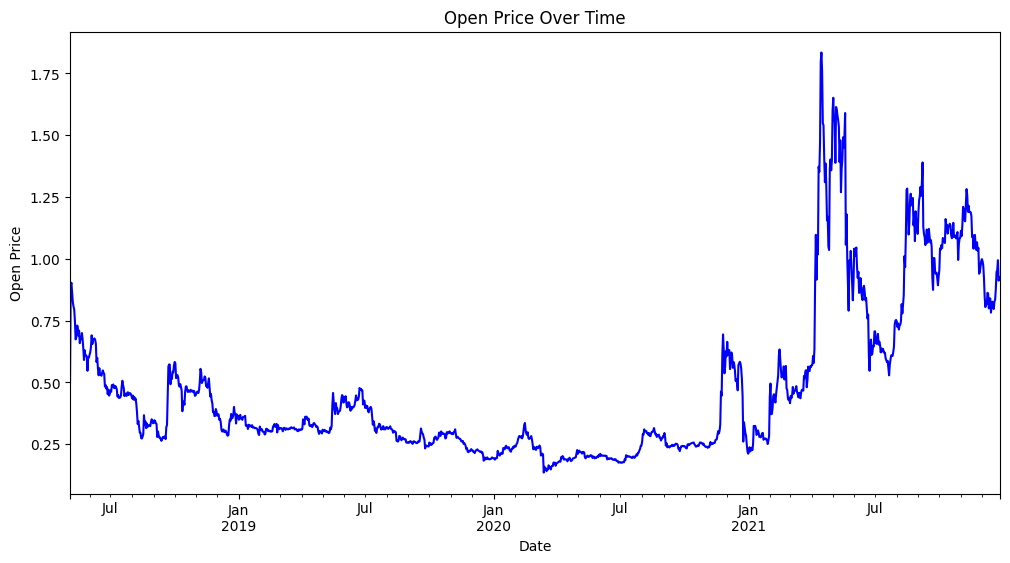

In [8]:
# open distribution
data1['open'].plot(figsize=(12, 6), color='blue')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price');

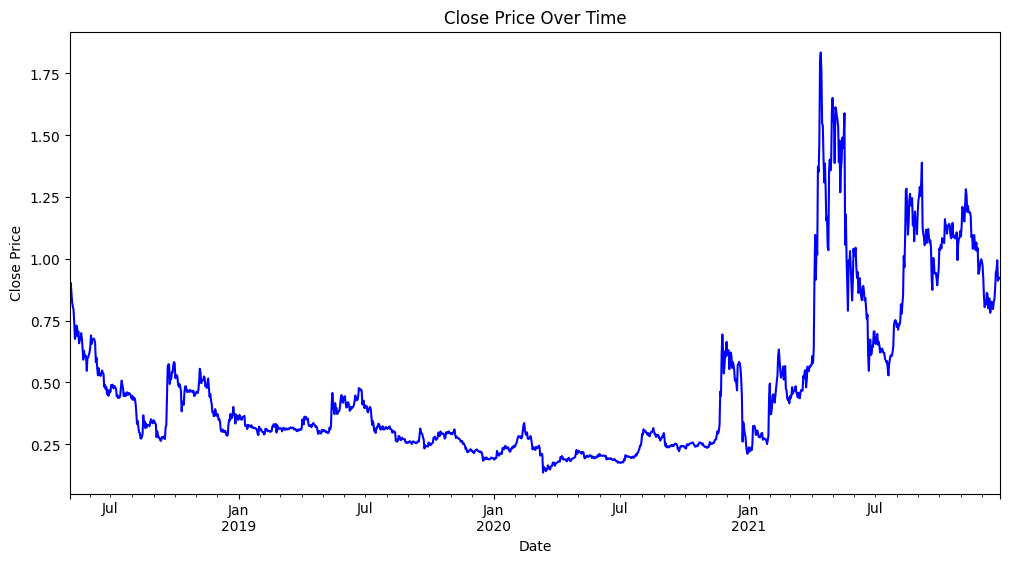

In [9]:
#close price distribution
data1['close'].plot(figsize=(12, 6), color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price');

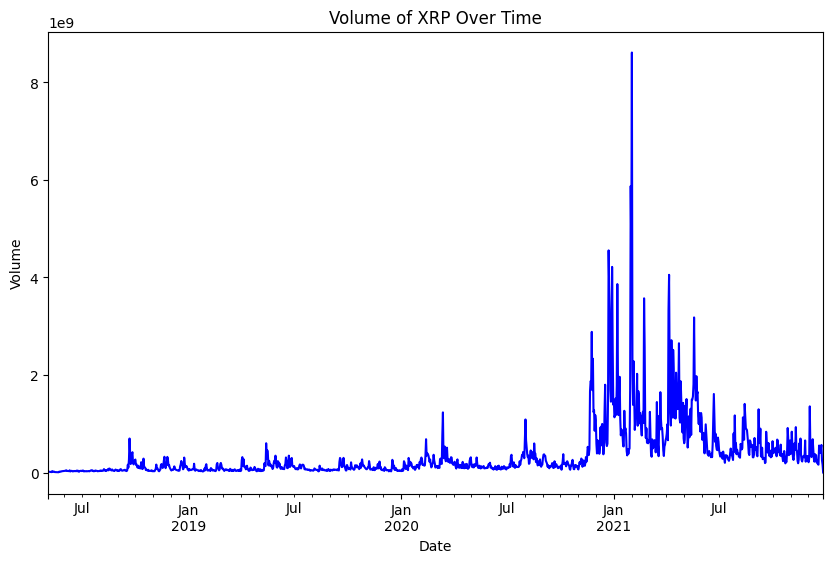

In [10]:
data1['Volume XRP'].plot(figsize=(10,6), color='blue')
plt.title('Volume of XRP Over Time')
plt.xlabel('Date')
plt.ylabel('Volume');

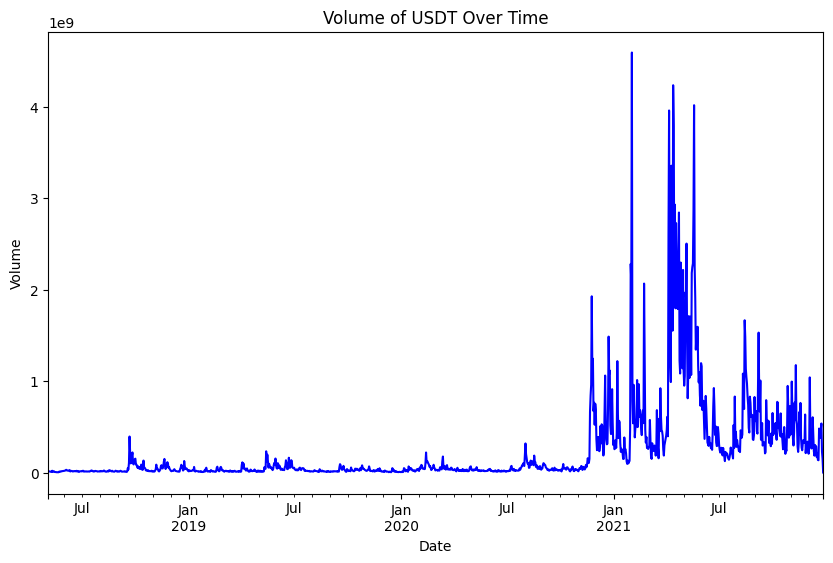

In [11]:
data1['Volume USDT'].plot(figsize=(10,6), color='blue')
plt.title('Volume of USDT Over Time')
plt.xlabel('Date')
plt.ylabel('Volume');

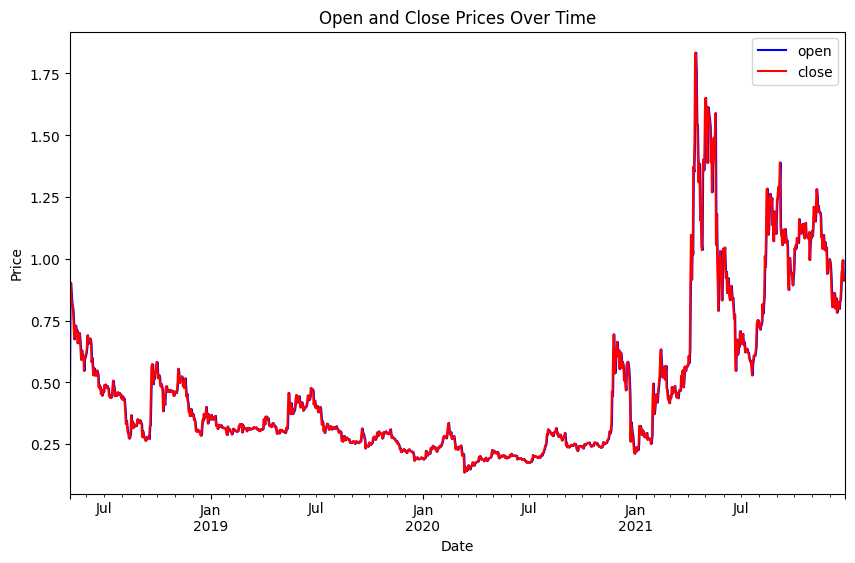

In [12]:
data1[['open', 'close']].plot(figsize=(10, 6), color=['blue', 'red'])
plt.title('Open and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price');

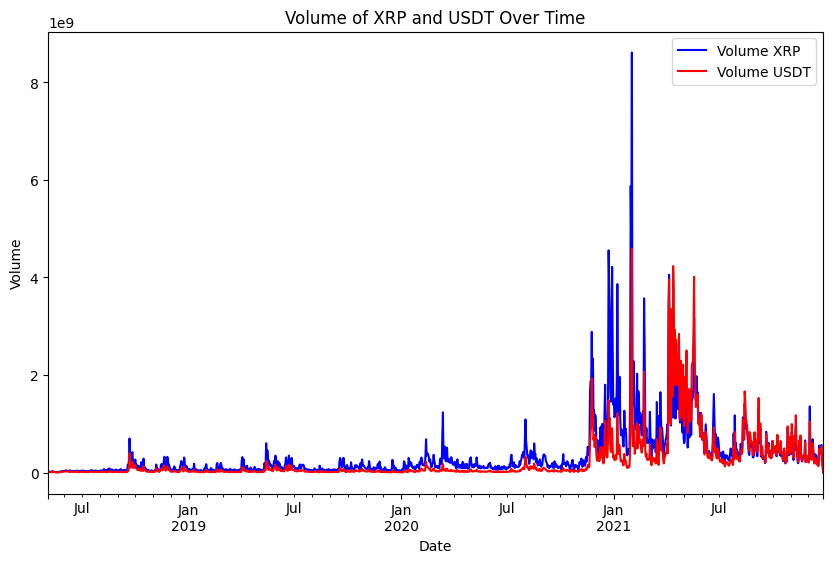

In [13]:
data1[['Volume XRP', 'Volume USDT']].plot(figsize=(10, 6), color=['blue', 'red'])
plt.title('Volume of XRP and USDT Over Time')
plt.xlabel('Date')
plt.ylabel('Volume');

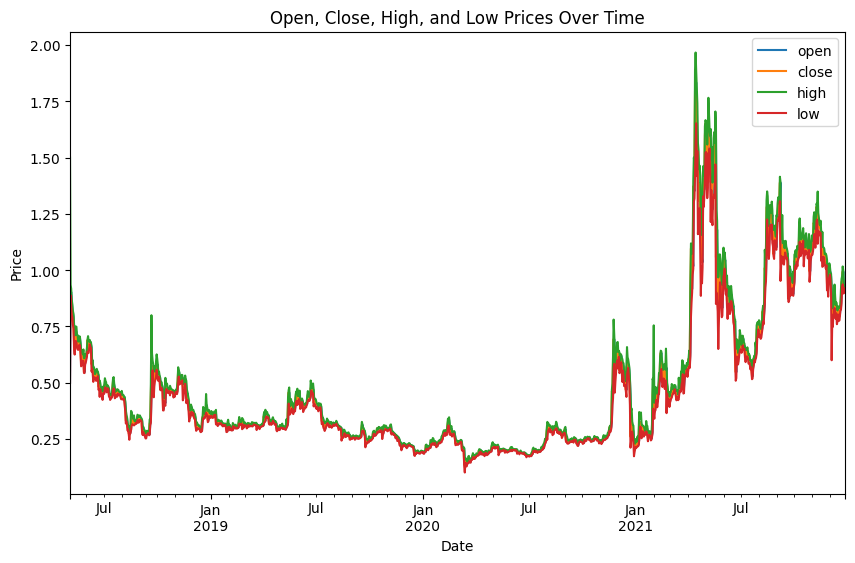

In [14]:
data1[['open', 'close', 'high', 'low']].plot(figsize=(10, 6))
plt.title('Open, Close, High, and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price');

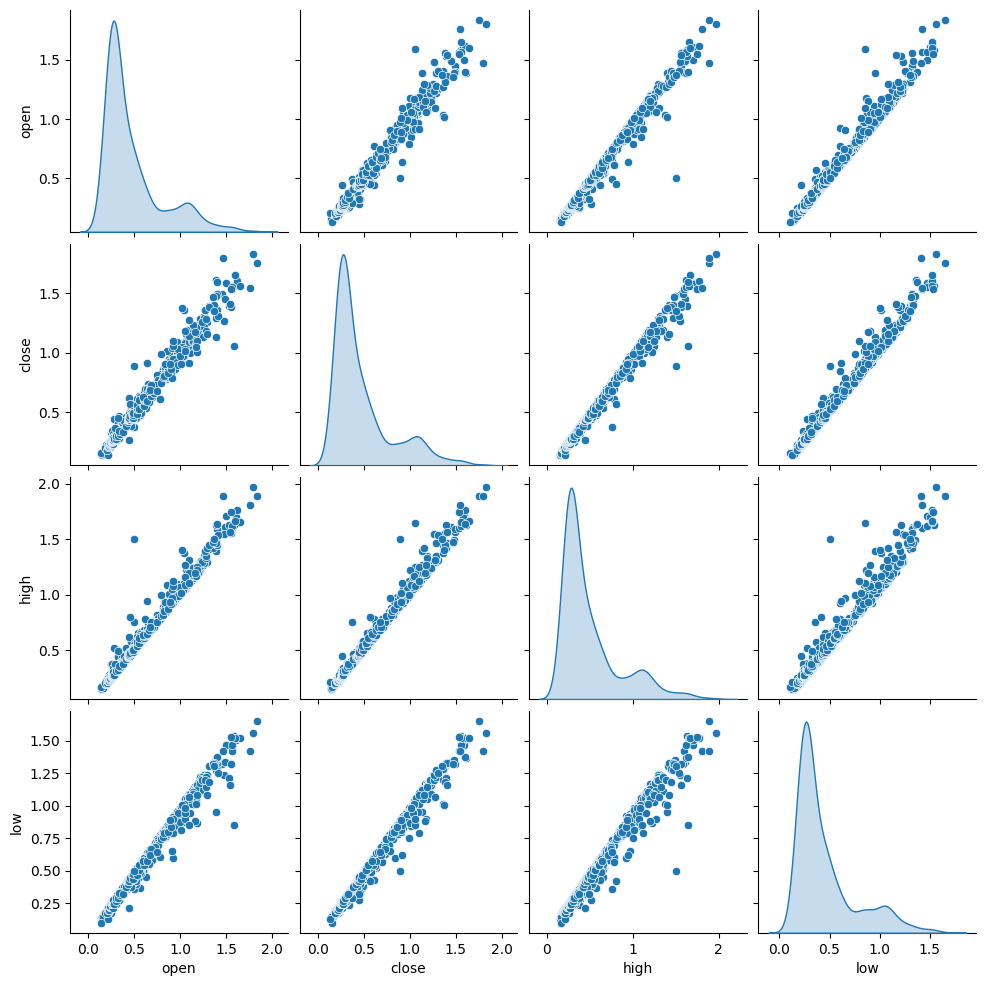

In [15]:
sns.pairplot(data1[['open', 'close', 'high', 'low']], diag_kind='kde');

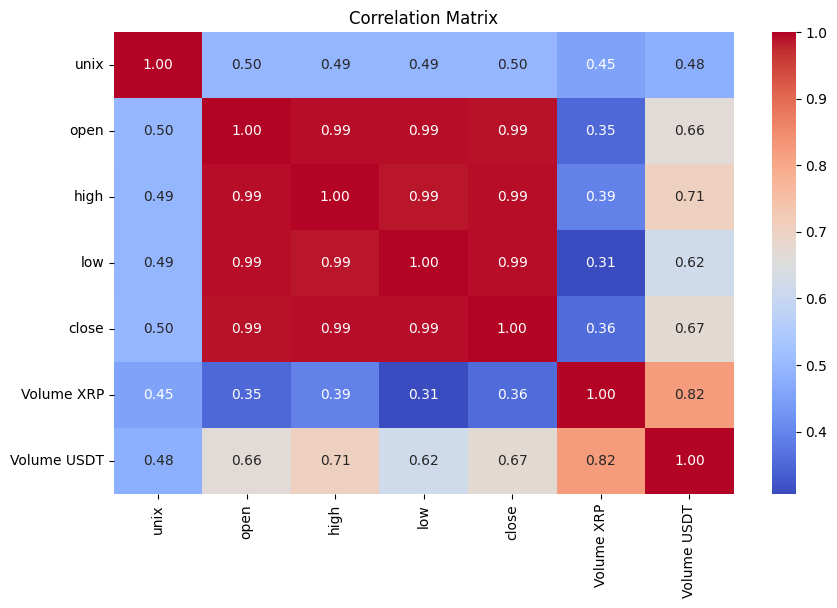

In [16]:
#correlation matrix
correlation_matrix = data1.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [17]:
data1.iloc[250:]

,unix,symbol,open,high,low,close,Volume XRP,Volume USDT
date,,,,,,,,
2021-04-21,1.618960e+12,XRP-USDT,1.38500,1.46450,1.27545,1.29097,1.301404e+09,1.787718e+09
2021-04-20,1.618880e+12,XRP-USDT,1.30941,1.44796,1.18000,1.38501,1.522196e+09,1.998261e+09
2021-04-19,1.618790e+12,XRP-USDT,1.40797,1.53390,1.25100,1.30945,1.608074e+09,2.226346e+09
2021-04-18,1.618700e+12,XRP-USDT,1.53988,1.56505,1.16000,1.40797,2.048345e+09,2.726555e+09
2021-04-17,1.618620e+12,XRP-USDT,1.54805,1.74163,1.52991,1.53896,1.108826e+09,1.795845e+09
...,...,...,...,...,...,...,...,...
2018-05-08,1.525740e+12,XRP-USDT,0.82490,0.84802,0.79200,0.80667,1.297130e+07,1.057184e+07
2018-05-07,1.525650e+12,XRP-USDT,0.86482,0.86886,0.80000,0.82490,1.730349e+07,1.419228e+07
2018-05-06,1.525560e+12,XRP-USDT,0.90280,0.91800,0.83774,0.86483,1.600204e+07,1.399714e+07


In [18]:
data1.iloc[:250]

,unix,symbol,open,high,low,close,Volume XRP,Volume USDT
date,,,,,,,,
2021-12-27,1.640560e+12,XRP-USDT,0.92000,0.92370,0.92000,0.92260,2.384512e+06,2.198450e+06
2021-12-26,1.640480e+12,XRP-USDT,0.92520,0.93340,0.90520,0.92000,1.634385e+08,1.499400e+08
2021-12-25,1.640390e+12,XRP-USDT,0.91140,0.93500,0.89810,0.92520,2.500749e+08,2.302303e+08
2021-12-24,1.640300e+12,XRP-USDT,0.99410,0.99660,0.89640,0.91150,5.672341e+08,5.377035e+08
2021-12-23,1.640220e+12,XRP-USDT,0.95380,1.01670,0.93720,0.99410,4.794362e+08,4.729372e+08
...,...,...,...,...,...,...,...,...
2021-04-26,1.619400e+12,XRP-USDT,1.03530,1.37500,1.01330,1.36290,1.871916e+09,2.295854e+09
2021-04-25,1.619310e+12,XRP-USDT,1.04971,1.15600,0.94180,1.03510,1.026066e+09,1.083687e+09
2021-04-24,1.619220e+12,XRP-USDT,1.17019,1.17200,1.01753,1.04833,1.120814e+09,1.223944e+09


## Modeling

Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X = data1.drop(columns=['close', 'symbol', 'unix'])
y = data1['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#convert X_train and X_test to dataframes
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0006163937426711449


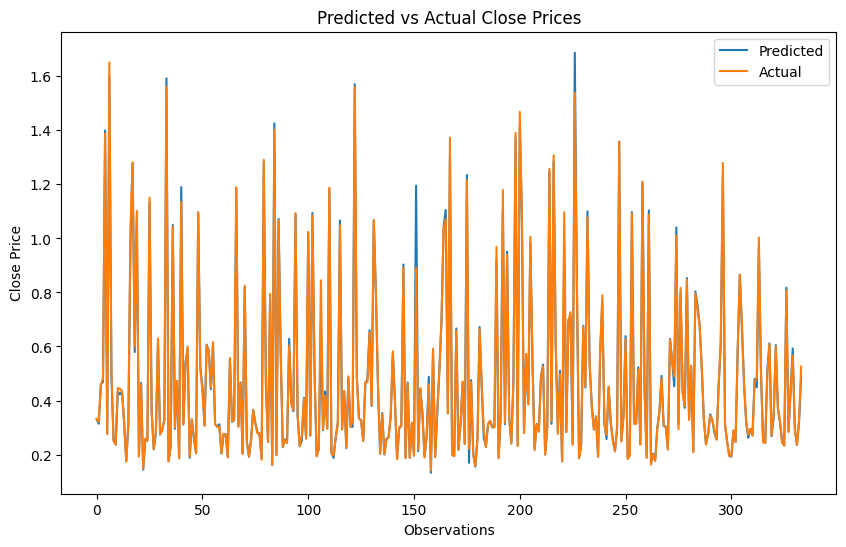

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.title('Predicted vs Actual Close Prices')
plt.xlabel('Observations')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Random Forest regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f'Random Forest Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')

Random Forest Mean Squared Error: 0.00045417273814721536


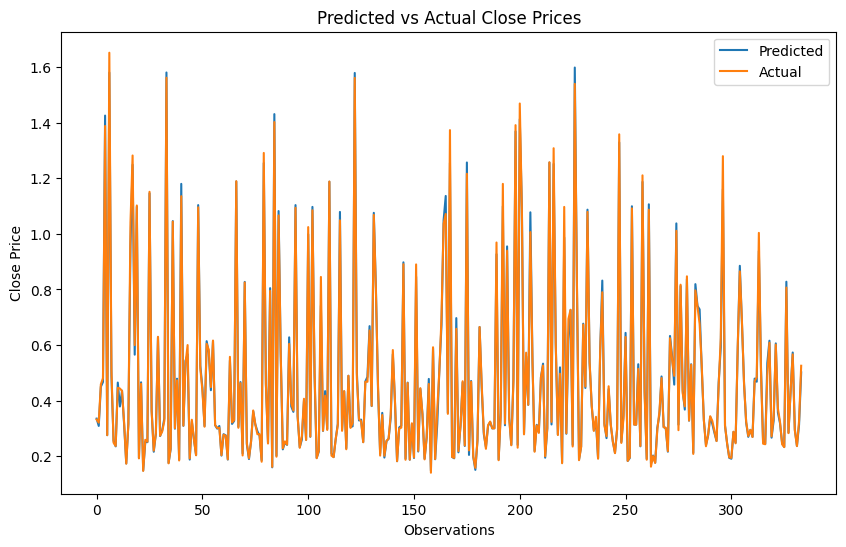

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred_rf, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.title('Predicted vs Actual Close Prices')
plt.xlabel('Observations')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Time Series analysis

In [23]:
! pip install statsmodels

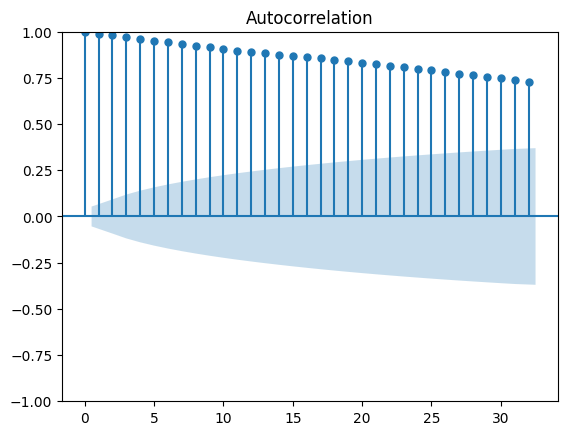

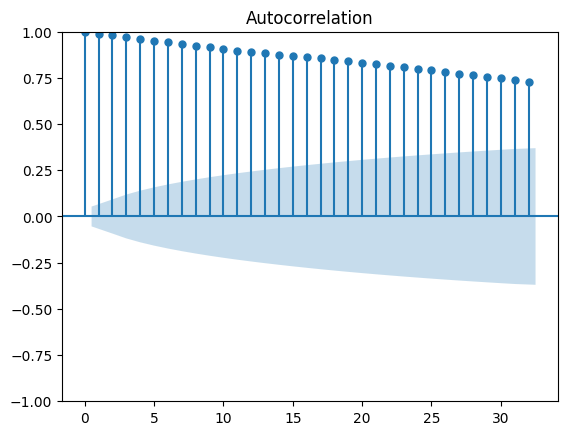

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data1['close'])


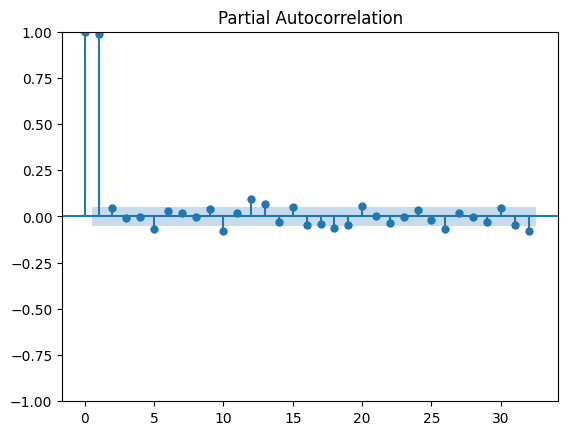

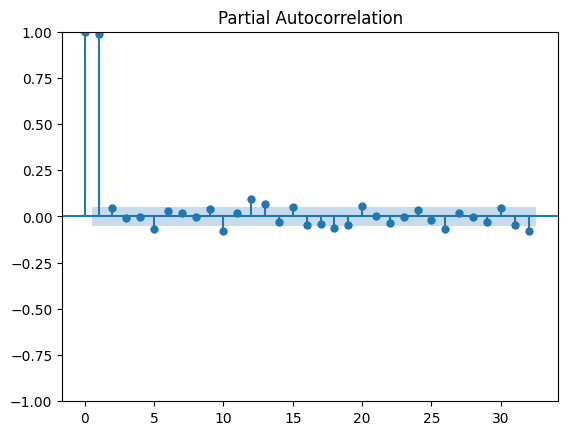

In [25]:
plot_pacf(data1['close'])

In [26]:
#test stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(data1['close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")
        

ADF Statistic: -2.3296780182516965
p-value: 0.16257476880393312
The time series is not stationary.


Making data stationary

In [28]:
import numpy as np
# Log transformation to stabilize variance
log_data = np.log(data1['close'])


In [30]:
log_data

date
2021-12-27   -0.080560
2021-12-26   -0.083382
2021-12-25   -0.077745
2021-12-24   -0.092664
2021-12-23   -0.005917
                ...   
2018-05-08   -0.214841
2018-05-07   -0.192493
2018-05-06   -0.145222
2018-05-05   -0.102254
2018-05-04   -0.116646
Name: close, Length: 1334, dtype: float64

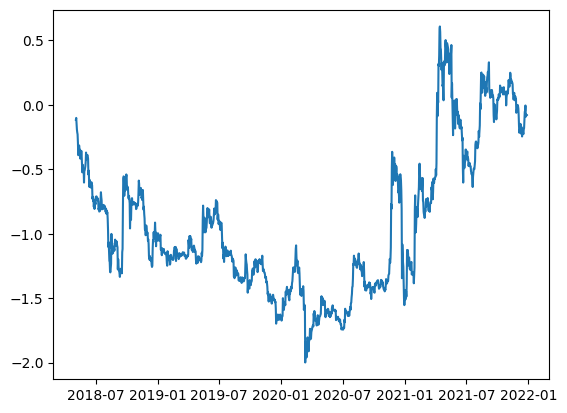

In [32]:
plt.plot(log_data)

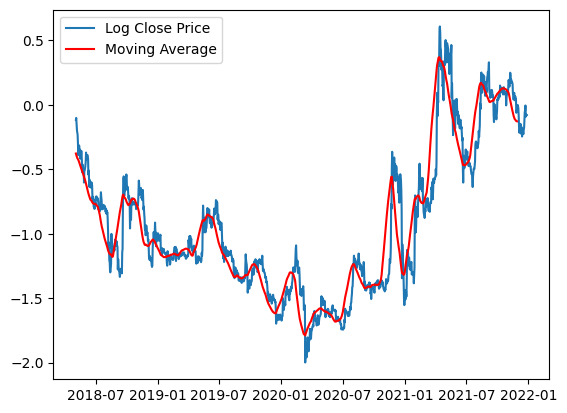

In [34]:
moving_average = log_data.rolling(window=30).mean()
moving_std = log_data.rolling(window=30).std()
plt.plot(log_data, label='Log Close Price')
plt.plot(moving_average, color='red', label='Moving Average')
plt.legend()

In [38]:
logMinusMovingAverage = log_data - moving_average
logMinusMovingAverage = logMinusMovingAverage.dropna()
logMinusMovingAverage.head(10)

date
2021-11-28    0.096729
2021-11-27    0.071364
2021-11-26    0.064513
2021-11-25    0.165875
2021-11-24    0.150929
2021-11-23    0.180525
2021-11-22    0.148566
2021-11-21    0.165448
2021-11-20    0.194892
2021-11-19    0.179353
Name: close, dtype: float64

In [39]:
#test stationarity again
result = adfuller(logMinusMovingAverage)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")
    

ADF Statistic: -6.563183296665349
p-value: 8.28270231799792e-09
The time series is stationary.


In [40]:
rolling_mean = logMinusMovingAverage.rolling(window=30).mean()
rolling_std = logMinusMovingAverage.rolling(window=30).std()

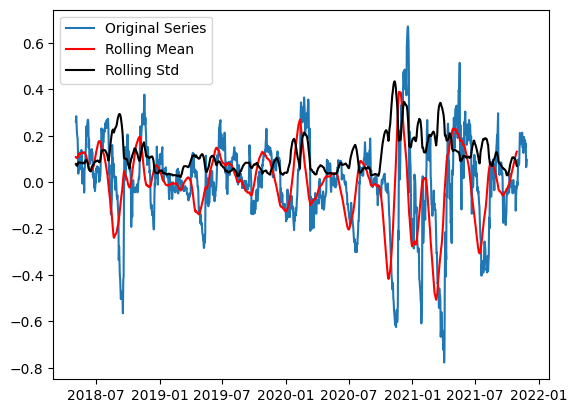

In [41]:
plt.plot(logMinusMovingAverage, label='Original Series')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend()

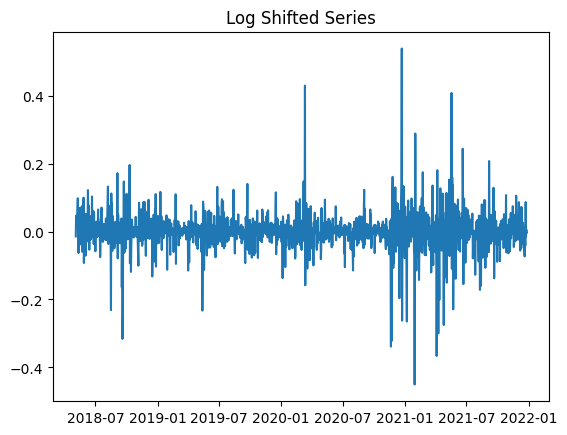

In [42]:
logshifted = log_data - log_data.shift(1)
logshifted = logshifted.dropna()
plt.plot(logshifted, label='Log Shifted Series')
plt.title('Log Shifted Series');

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition  = seasonal_decompose(logshifted)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

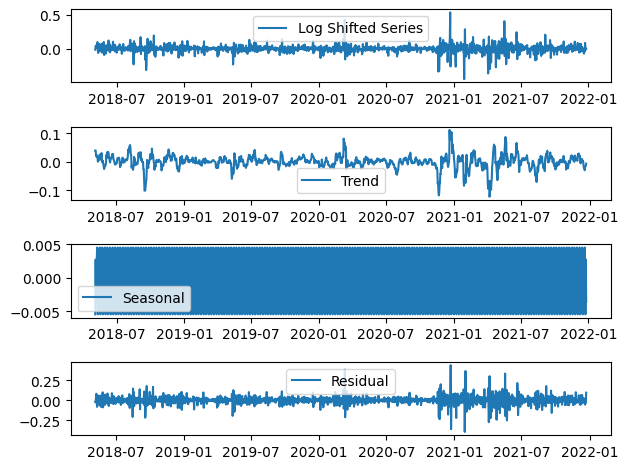

In [44]:
plt.subplot(411)
plt.plot(logshifted, label='Log Shifted Series')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()           